# Explaining Vehicle Theft Intensity Across Indian States (Census-Normalized Analysis)

## Must Read

This project analyzes state-level vehicle theft in India using Census 2001 population data, vehicle registration inflow, and reported theft statistics. The study focuses on normalization-driven insights, identifies metric distortions in Union Territories, and evaluates whether population or vehicle density better explains theft intensity.

#### All datasets are constrained to 2001 to avoid temporal mismatch bias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_one = r"C:\Users\Maanas\OneDrive\Desktop\Vehicle_Theft_Project\30_Auto_theft.csv"
data_two = r"C:\Users\Maanas\OneDrive\Desktop\Vehicle_Theft_Project\Population.csv"
data_three = r"C:\Users\Maanas\OneDrive\Desktop\Vehicle_Theft_Project\STATE_WISE_TOTAL_REGISTERED_MOTOR_VEHICLES_IN_INDIA_1.xls"

In [3]:
df1 = pd.read_csv(data_one, engine ="python")
df2 = pd.read_csv(data_two,engine ="python")
df3 = pd.read_excel(data_three)

In [4]:
df1.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946


In [5]:
df1.describe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area_Name                      1865 non-null   object 
 1   Year                           1865 non-null   int64  
 2   Group_Name                     1865 non-null   object 
 3   Sub_Group_Name                 1865 non-null   object 
 4   Auto_Theft_Coordinated/Traced  1519 non-null   float64
 5   Auto_Theft_Recovered           1837 non-null   float64
 6   Auto_Theft_Stolen              1865 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 102.1+ KB


In [6]:
df1=df1.rename(columns={'Area_Name':'State'})

In [7]:
df1.head()

,State,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946


In [8]:
df2.head()
df2.columns

Index(['Unnamed: 0', 'State', 'District', 'Persons', 'Males', 'Females',
       'Growth..1991...2001.', 'Rural', 'Urban', 'Scheduled.Caste.population',
       'Percentage...SC.to.total', 'Number.of.households',
       'Household.size..per.household.', 'Sex.ratio..females.per.1000.males.',
       'Sex.ratio..0.6.years.', 'Scheduled.Tribe.population',
       'Percentage.to.total.population..ST.', 'Persons..literate',
       'Males..Literate', 'Females..Literate', 'Persons..literacy.rate',
       'Males..Literatacy.Rate', 'Females..Literacy.Rate', 'Total.Educated',
       'Data.without.level', 'Below.Primary', 'Primary', 'Middle',
       'Matric.Higher.Secondary.Diploma', 'Graduate.and.Above', 'X0...4.years',
       'X5...14.years', 'X15...59.years', 'X60.years.and.above..Incl..A.N.S..',
       'Total.workers', 'Main.workers', 'Marginal.workers', 'Non.workers',
       'SC.1.Name', 'SC.1.Population', 'SC.2.Name', 'SC.2.Population',
       'SC.3.Name', 'SC.3.Population', 'Religeon.1.Name',


### Pre-Processing

In [9]:
df2=df2.drop(columns=['Males', 'Females',
       'Growth..1991...2001.', 'Rural', 'Urban', 'Scheduled.Caste.population',
       'Percentage...SC.to.total', 'Number.of.households',
       'Household.size..per.household.', 'Sex.ratio..females.per.1000.males.',
       'Sex.ratio..0.6.years.', 'Scheduled.Tribe.population',
       'Percentage.to.total.population..ST.', 'Persons..literate',
       'Males..Literate', 'Females..Literate', 'Persons..literacy.rate',
       'Males..Literatacy.Rate', 'Females..Literacy.Rate', 'Total.Educated',
       'Data.without.level', 'Below.Primary', 'Primary', 'Middle',
       'Matric.Higher.Secondary.Diploma', 'Graduate.and.Above', 'X0...4.years',
       'X5...14.years', 'X15...59.years', 'X60.years.and.above..Incl..A.N.S..',
       'Total.workers', 'Main.workers', 'Marginal.workers', 'Non.workers',
       'SC.1.Name', 'SC.1.Population', 'SC.2.Name', 'SC.2.Population',
       'SC.3.Name', 'SC.3.Population', 'Religeon.1.Name',
       'Religeon.1.Population', 'Religeon.2.Name', 'Religeon.2.Population',
       'Religeon.3.Name', 'Religeon.3.Population', 'ST.1.Name',
       'ST.1.Population', 'ST.2.Name', 'ST.2.Population', 'ST.3.Name',
       'ST.3.Population', 'Imp.Town.1.Name', 'Imp.Town.1.Population',
       'Imp.Town.2.Name', 'Imp.Town.2.Population', 'Imp.Town.3.Name',
       'Imp.Town.3.Population', 'Total.Inhabited.Villages',
       'Drinking.water.facilities', 'Safe.Drinking.water',
       'Electricity..Power.Supply.', 'Electricity..domestic.',
       'Electricity..Agriculture.', 'Primary.school', 'Middle.schools',
       'Secondary.Sr.Secondary.schools', 'College', 'Medical.facility',
       'Primary.Health.Centre', 'Primary.Health.Sub.Centre',
       'Post..telegraph.and.telephone.facility', 'Bus.services',
       'Paved.approach.road', 'Mud.approach.road', 'Permanent.House',
       'Semi.permanent.House', 'Temporary.House','Unnamed: 0','District'])

In [10]:
df2.head()
df2=df2.groupby('State').sum()

In [11]:
type(df2)

pandas.core.frame.DataFrame

In [12]:
df2.head(10)

,Persons
State,
AN,356152
Andhra,71308587
ArunachalPradesh,1097968
Assam,26655528
Bihar,82998509
CG,20833803
Chandigarh,900635
D_D,158204
D_N_H,220490


In [13]:
df1 =df1[df1['Year']==2001]

In [14]:
df1['State'].unique()
df1.head()
df1.isna().sum()

State                             0
Year                              0
Group_Name                        0
Sub_Group_Name                    0
Auto_Theft_Coordinated/Traced    32
Auto_Theft_Recovered              2
Auto_Theft_Stolen                 0
dtype: int64

In [15]:
df1=df1.fillna(0)

In [16]:
df3=df3.rename(columns={'State/Union Territory':'State'})

In [17]:
df3.head()
df3=df3.rename(columns={2001:'Registered in 2001'})

In [18]:
df3=df3.drop(index=36)

In [19]:
df3=df3.drop(index=37)

In [20]:
df3=df3.drop(columns=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011])

In [21]:
df3.head(40)

,State,Registered in 2001
0,Andhra Pradesh,3966
1,Arunachal Pradesh,21
2,Assam,542
3,Bihar,949
4,Chhatisgarh,857
5,Goa,341
6,Gujarat,5576
7,Haryana,1949
8,Himachal Pradesh,217
9,Jammu & Kashmir,330


In [22]:
df1['Year'].unique()

array([2001], dtype=int64)

In [23]:
df2=df2.reset_index()

In [24]:
df2
df3['State'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam ', 'Bihar ',
       'Chhatisgarh', 'Goa', 'Gujarat', 'Haryana ', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur  ', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu ', 'Tripura', 'Uttarakhand', 'Uttar Pradesh',
       'West Bengal', 'TOTAL STATES', 'A. & N. Islands', 'Chandigarh',
       'D. & N. Haveli ', 'Daman & Diu', 'Delhi', 'Lakshadweep',
       'Puducherry'], dtype=object)

In [25]:
df2['State'] = df2['State'].replace({
    'AN': 'ANDAMAN AND NICOBAR ISLANDS',
    'Andhra': 'ANDHRA PRADESH',
    'ArunachalPradesh': 'ARUNACHAL PRADESH',
    'CG': 'CHHATTISGARH',
    'D_D': 'DAMAN AND DIU',
    'D_N_H': 'DADRA AND NAGAR HAVELI',
    'HP': 'HIMACHAL PRADESH',
    'JK': 'JAMMU AND KASHMIR',
    'Orissa': 'ODISHA',
    'Uttaranchal': 'UTTARAKHAND',
    'A. & N. Islands': 'ANDAMAN AND NICOBAR ISLANDS',
    'D. & N. Haveli': 'DADRA AND NAGAR HAVELI',
    'Daman & Diu': 'DAMAN AND DIU',
    'Delhi': 'DELHI',
    'Andhra Pradesh': 'ANDHRA PRADESH',
    'Arunachal Pradesh': 'ARUNACHAL PRADESH',
    'Assam': 'ASSAM',
    'Bihar': 'BIHAR',
    'Chhatisgarh': 'CHHATTISGARH',
    'Goa': 'GOA',
    'Gujarat': 'GUJARAT',
    'Haryana': 'HARYANA',
    'Himachal Pradesh': 'HIMACHAL PRADESH',
    'Jammu & Kashmir': 'JAMMU AND KASHMIR',
    'Jharkhand': 'JHARKHAND',
    'Karnataka': 'KARNATAKA',
    'Kerala': 'KERALA',
    'Madhya Pradesh': 'MADHYA PRADESH',
    'Maharashtra': 'MAHARASHTRA',
    'Manipur': 'MANIPUR',
    'Meghalaya': 'MEGHALAYA',
    'Mizoram': 'MIZORAM',
    'Nagaland': 'NAGALAND',
    'Punjab': 'PUNJAB',
    'Rajasthan': 'RAJASTHAN',
    'Sikkim': 'SIKKIM',
    'Tamil Nadu': 'TAMIL NADU',
    'Tripura': 'TRIPURA',
    'Uttarakhand': 'UTTARAKHAND',
    'Uttar Pradesh': 'UTTAR PRADESH',
    'West Bengal': 'WEST BENGAL',
    'Chandigarh': 'CHANDIGARH',
    'Lakshadweep': 'LAKSHADWEEP',
    'Puducherry': 'PUDUCHERRY'
})


In [26]:
df1['State'] = df1['State'].replace({
    'Andaman & Nicobar Islands': 'ANDAMAN AND NICOBAR ISLANDS',
    'Andhra Pradesh': 'ANDHRA PRADESH',
    'Arunachal Pradesh': 'ARUNACHAL PRADESH',
    'Assam': 'ASSAM',
    'Bihar': 'BIHAR',
    'Chandigarh': 'CHANDIGARH',
    'Chhattisgarh': 'CHHATTISGARH',
    'Dadra & Nagar Haveli': 'DADRA AND NAGAR HAVELI',
    'Delhi': 'DELHI',
    'Goa': 'GOA',
    'Gujarat': 'GUJARAT',
    'Haryana': 'HARYANA',
    'Himachal Pradesh': 'HIMACHAL PRADESH',
    'Jammu & Kashmir': 'JAMMU AND KASHMIR',
    'Jharkhand': 'JHARKHAND',
    'Karnataka': 'KARNATAKA',
    'Kerala': 'KERALA',
    'Madhya Pradesh': 'MADHYA PRADESH',
    'Maharashtra': 'MAHARASHTRA',
    'Manipur': 'MANIPUR',
    'Meghalaya': 'MEGHALAYA',
    'Mizoram': 'MIZORAM',
    'Nagaland': 'NAGALAND',
    'Odisha': 'ODISHA',
    'Puducherry': 'PUDUCHERRY',
    'Punjab': 'PUNJAB',
    'Rajasthan': 'RAJASTHAN',
    'Sikkim': 'SIKKIM',
    'Tamil Nadu': 'TAMIL NADU',
    'Tripura': 'TRIPURA',
    'Uttar Pradesh': 'UTTAR PRADESH',
    'Uttarakhand': 'UTTARAKHAND',
    'West Bengal': 'WEST BENGAL'
})


In [27]:
# Remove leading and trailing spaces
df3['State'] = df3['State'].str.strip()

# Replace short and incorrect names
df3['State'] = df3['State'].replace({
    'Chhatisgarh': 'CHHATTISGARH',
    'Orissa': 'ODISHA',
    'A. & N. Islands': 'ANDAMAN AND NICOBAR ISLANDS',
    'D. & N. Haveli': 'DADRA AND NAGAR HAVELI',
    'Daman & Diu': 'DAMAN AND DIU',
    'Jammu & Kashmir': 'JAMMU AND KASHMIR'
})

# Convert everything to uppercase and fix &
df3['State'] = df3['State'].str.upper().str.replace('&', 'AND')


In [28]:
df3['State']

0                  ANDHRA PRADESH
1               ARUNACHAL PRADESH
2                           ASSAM
3                           BIHAR
4                    CHHATTISGARH
5                             GOA
6                         GUJARAT
7                         HARYANA
8                HIMACHAL PRADESH
9               JAMMU AND KASHMIR
10                      JHARKHAND
11                      KARNATAKA
12                         KERALA
13                 MADHYA PRADESH
14                    MAHARASHTRA
15                        MANIPUR
16                      MEGHALAYA
17                        MIZORAM
18                       NAGALAND
19                         ODISHA
20                         PUNJAB
21                      RAJASTHAN
22                         SIKKIM
23                     TAMIL NADU
24                        TRIPURA
25                    UTTARAKHAND
26                  UTTAR PRADESH
27                    WEST BENGAL
28                   TOTAL STATES
29    ANDAMAN 

In [29]:
df2['State']

0     ANDAMAN AND NICOBAR ISLANDS
1                  ANDHRA PRADESH
2               ARUNACHAL PRADESH
3                           ASSAM
4                           BIHAR
5                    CHHATTISGARH
6                      CHANDIGARH
7                   DAMAN AND DIU
8          DADRA AND NAGAR HAVELI
9                           DELHI
10                            GOA
11                        GUJARAT
12               HIMACHAL PRADESH
13                        HARYANA
14              JAMMU AND KASHMIR
15                      JHARKHAND
16                      KARNATAKA
17                         KERALA
18                     Lakshdweep
19                             MP
20                    MAHARASHTRA
21                        MANIPUR
22                       Meghalya
23                        MIZORAM
24                       NAGALAND
25                         Orrisa
26                    Pondicherry
27                         PUNJAB
28                      RAJASTHAN
29            

In [30]:
df2['State']=df2['State'].replace({'Pondicherry':'PONDICHERRY','Uttranchal':'UTTARAKHAND','Lakshdweep':'LAKSHADWEEP','MP':'MADHYA PRADESH','Meghalya':'MEGHALAYA','Orrisa':'ODISHA','TN':'TAMIL NADU','UP':'UTTAR PRADESH','WB':'WEST BENGAL'})

In [47]:
df1=df1.groupby('State').sum()


In [51]:
df1=df1.reset_index()

In [60]:
df1['State']
df2

,State,Persons
0,ANDAMAN AND NICOBAR ISLANDS,356152
1,ANDHRA PRADESH,71308587
2,ARUNACHAL PRADESH,1097968
3,ASSAM,26655528
4,BIHAR,82998509
5,CHHATTISGARH,20833803
6,CHANDIGARH,900635
7,DAMAN AND DIU,158204
8,DADRA AND NAGAR HAVELI,220490
9,DELHI,13850507


In [57]:
set(df2['State'])-set(df1['State'])

{'DAMAN AND DIU', 'LAKSHADWEEP', 'PONDICHERRY'}

In [62]:
df1=df1.replace({'PUDUCHERRY':'PONDICHERRY'})

In [63]:
set(df2['State'])-set(df1['State'])

{'DAMAN AND DIU', 'LAKSHADWEEP'}

In [65]:
df2=df2.drop(index=7)

In [66]:
df2=df2.drop(index=18)

In [69]:
set(df1['State'])-set(df3['State'])

{'PONDICHERRY'}

In [70]:
df3['State']

0                  ANDHRA PRADESH
1               ARUNACHAL PRADESH
2                           ASSAM
3                           BIHAR
4                    CHHATTISGARH
5                             GOA
6                         GUJARAT
7                         HARYANA
8                HIMACHAL PRADESH
9               JAMMU AND KASHMIR
10                      JHARKHAND
11                      KARNATAKA
12                         KERALA
13                 MADHYA PRADESH
14                    MAHARASHTRA
15                        MANIPUR
16                      MEGHALAYA
17                        MIZORAM
18                       NAGALAND
19                         ODISHA
20                         PUNJAB
21                      RAJASTHAN
22                         SIKKIM
23                     TAMIL NADU
24                        TRIPURA
25                    UTTARAKHAND
26                  UTTAR PRADESH
27                    WEST BENGAL
28                   TOTAL STATES
29    ANDAMAN 

In [71]:
df3=df3.replace({'PUDUCHERRY':'PONDICHERRY'})

In [72]:
df3=df3.drop(index=28)

In [74]:
set(df3['State'])-set(df1['State'])

{'DAMAN AND DIU', 'LAKSHADWEEP'}

In [76]:
df3=df3.drop(index=32)

In [77]:
df3=df3.drop(index=34)

In [86]:
set(df3['State'])-set(df2['State'])

set()

In [87]:
df1copy=df1
df2copy=df2
df3copy=df3

In [89]:
df1=df1.sort_values(by='State',ascending=True)

In [91]:
df2=df2.sort_values(by='State',ascending=True)

In [93]:
df3=df3.sort_values(by='State',ascending=True)

In [94]:
df1copy=df1
df2copy=df2
df3copy=df3

In [95]:
df2copy

,State,Persons
0,ANDAMAN AND NICOBAR ISLANDS,356152
1,ANDHRA PRADESH,71308587
2,ARUNACHAL PRADESH,1097968
3,ASSAM,26655528
4,BIHAR,82998509
6,CHANDIGARH,900635
5,CHHATTISGARH,20833803
8,DADRA AND NAGAR HAVELI,220490
9,DELHI,13850507
10,GOA,1347668


In [96]:
df=df1copy.merge(df2copy[['State','Persons']],on='State',how='left')

In [97]:
assert df['Persons'].isna().sum() == 0

In [98]:
df.isna().sum()

State                            0
Year                             0
Group_Name                       0
Sub_Group_Name                   0
Auto_Theft_Coordinated/Traced    0
Auto_Theft_Recovered             0
Auto_Theft_Stolen                0
Persons                          0
dtype: int64

In [99]:
df=df.merge(df3copy[['State','Registered in 2001']],on='State',how='left')

In [100]:
df.isna().sum()

State                            0
Year                             0
Group_Name                       0
Sub_Group_Name                   0
Auto_Theft_Coordinated/Traced    0
Auto_Theft_Recovered             0
Auto_Theft_Stolen                0
Persons                          0
Registered in 2001               0
dtype: int64

In [101]:
df

,State,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen,Persons,Registered in 2001
0,ANDAMAN AND NICOBAR ISLANDS,4002,AT1-Motor Cycles/ ScootersAT6-Total,1. Motor Cycles/ Scooters6. Total (Sum of 1-5 ...,0.0,8.0,8,356152,25
1,ANDHRA PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,358.0,2960.0,6230,71308587,3966
2,ARUNACHAL PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,54.0,72,1097968,21
3,ASSAM,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,298.0,876,26655528,542
4,BIHAR,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,102.0,500.0,2272,82998509,949
5,CHANDIGARH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,400.0,988,900635,386
6,CHHATTISGARH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,52.0,830.0,1884,20833803,857
7,DADRA AND NAGAR HAVELI,8004,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,10.0,30,220490,13
8,DELHI,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,384.0,4100.0,15962,13850507,3635
9,GOA,8004,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,22.0,172.0,356,1347668,341


#### Diving States and UT's

In [102]:
states_only = df[~df['State'].isin([
    'CHANDIGARH', 'DELHI', 'PONDICHERRY',
    'ANDAMAN AND NICOBAR ISLANDS','GOA','DAMAN AND DIU','DADRA AND NAGAR HAVELI',
])].copy()


In [103]:
ut_only = df[df['State'].isin([
    'CHANDIGARH', 'DELHI', 'PONDICHERRY',
    'ANDAMAN AND NICOBAR ISLANDS','GOA','DAMAN AND DIU','DADRA AND NAGAR HAVELI',
])].copy()


In [104]:
df['Theft per capita'] =  ((df['Auto_Theft_Stolen'] / df['Persons'] )* 100000)

In [105]:
df['Recovery_Rate'] = (df['Auto_Theft_Recovered'] / df['Auto_Theft_Stolen'])

In [109]:
states_only['Theft per capita'] =  ((states_only['Auto_Theft_Stolen'] / states_only['Persons'] )* 100000)
states_only['Recovery_Rate'] = (states_only['Auto_Theft_Recovered'] / states_only['Auto_Theft_Stolen'])

In [110]:
states_only

,State,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen,Persons,Registered in 2001,Theft per capita,Recovery_Rate
1,ANDHRA PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,358.0,2960.0,6230,71308587,3966,8.736676,0.475120
2,ARUNACHAL PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,54.0,72,1097968,21,6.557568,0.750000
3,ASSAM,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,298.0,876,26655528,542,3.286373,0.340183
4,BIHAR,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,102.0,500.0,2272,82998509,949,2.737399,0.220070
6,CHHATTISGARH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,52.0,830.0,1884,20833803,857,9.042996,0.440552
10,GUJARAT,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,946.0,3180.0,11074,50671017,5576,21.854702,0.287159
11,HARYANA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,158.0,3020.0,6240,21144564,1949,29.511131,0.483974
12,HIMACHAL PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,24.0,196.0,290,6077900,217,4.771385,0.675862
13,JAMMU AND KASHMIR,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,2.0,274.0,1266,10143700,330,12.480653,0.216430
14,JHARKHAND,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,30.0,96.0,478,26945829,909,1.773929,0.200837


In [111]:
ut_only['Theft per capita'] =  ((ut_only['Auto_Theft_Stolen'] / ut_only['Persons'] )* 100000)
ut_only['Recovery_Rate'] = (ut_only['Auto_Theft_Recovered'] / ut_only['Auto_Theft_Stolen'])

#### Analysis

In [120]:
(states_only.sort_values(by='Theft per capita',ascending=False)).head(8)

,State,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen,Persons,Registered in 2001,Theft per capita,Recovery_Rate
11,HARYANA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,158.0,3020.0,6240,21144564,1949,29.511131,0.483974
10,GUJARAT,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,946.0,3180.0,11074,50671017,5576,21.854702,0.287159
18,MAHARASHTRA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,2400.0,5884.0,17774,96878627,6760,18.346668,0.331045
15,KARNATAKA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,502.0,2496.0,7726,52850562,3537,14.618577,0.323065
17,MADHYA PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,2534.0,8646,60348023,3095,14.326898,0.293084
26,RAJASTHAN,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,156.0,1806.0,8078,56507188,2943,14.295526,0.223570
28,TAMIL NADU,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,5516.0,8520,62405679,5162,13.652604,0.647418
13,JAMMU AND KASHMIR,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,2.0,274.0,1266,10143700,330,12.480653,0.216430


<Axes: xlabel='State'>

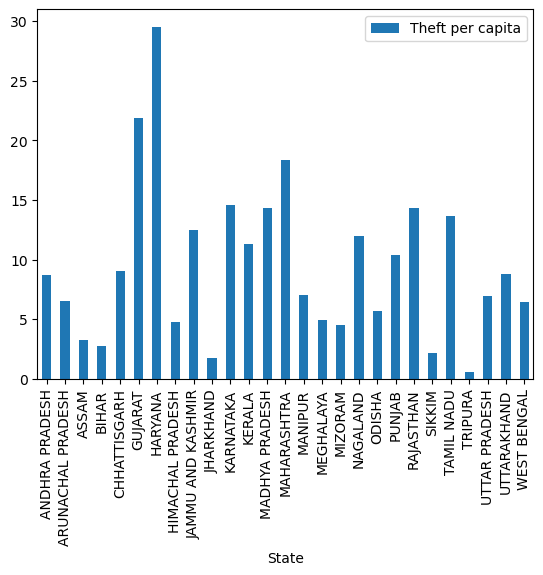

In [115]:
states_only.plot(y='Theft per capita',x='State',kind='bar')

In [122]:
(states_only.sort_values(by='Auto_Theft_Stolen',ascending=False)).head(16)

,State,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen,Persons,Registered in 2001,Theft per capita,Recovery_Rate
18,MAHARASHTRA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,2400.0,5884.0,17774,96878627,6760,18.346668,0.331045
30,UTTAR PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,70.0,2354.0,11580,166197921,4921,6.967596,0.203282
10,GUJARAT,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,946.0,3180.0,11074,50671017,5576,21.854702,0.287159
17,MADHYA PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,2534.0,8646,60348023,3095,14.326898,0.293084
28,TAMIL NADU,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,5516.0,8520,62405679,5162,13.652604,0.647418
26,RAJASTHAN,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,156.0,1806.0,8078,56507188,2943,14.295526,0.223570
15,KARNATAKA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,502.0,2496.0,7726,52850562,3537,14.618577,0.323065
11,HARYANA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,158.0,3020.0,6240,21144564,1949,29.511131,0.483974
1,ANDHRA PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,358.0,2960.0,6230,71308587,3966,8.736676,0.475120
32,WEST BENGAL,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,32.0,1582.0,5158,80176197,1690,6.433331,0.306708


<Axes: xlabel='State'>

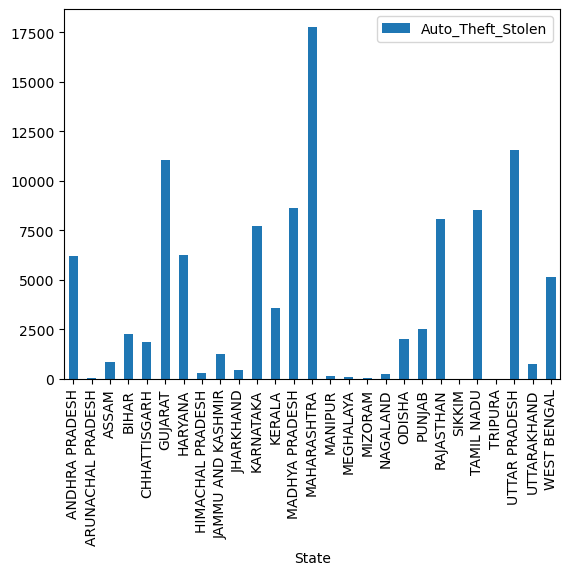

In [116]:
states_only.plot(y='Auto_Theft_Stolen',x='State',kind='bar')

#1. Which states have the highest theft intensity after normalizing by population?

After Normalization Harayana has the highest theft count, while it's abosulte theft count value drops down to 9th place.
Another insight from the data is that out of the top 8 states in normalized theft, top 7 are present in the top of absolute theft as well.
On the contrary J&K fell from being at 8th in normalized theft to being 16th in absolute theft.
There is no such big state bias, as even after normalization the top is still occupied by the same states as latter.

<Axes: title={'center': 'Theft per Capita vs Popuation'}, xlabel='Theft per capita', ylabel='Persons'>

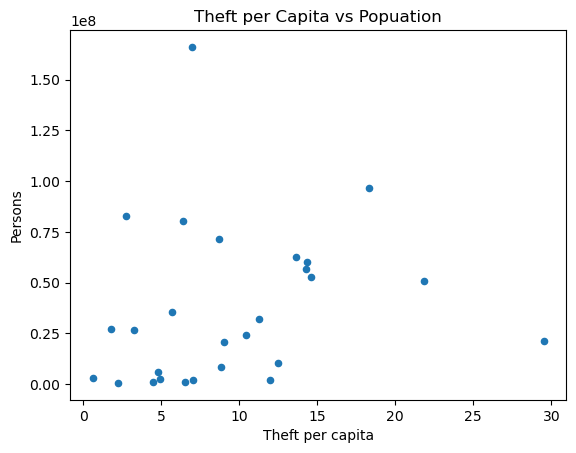

In [123]:
states_only.plot.scatter(x='Theft per capita',y='Persons',title='Theft per Capita vs Popuation')

<Axes: title={'center': 'Theft per Capita vs Vehicle Registration in 2001'}, xlabel='Theft per capita', ylabel='Registered in 2001'>

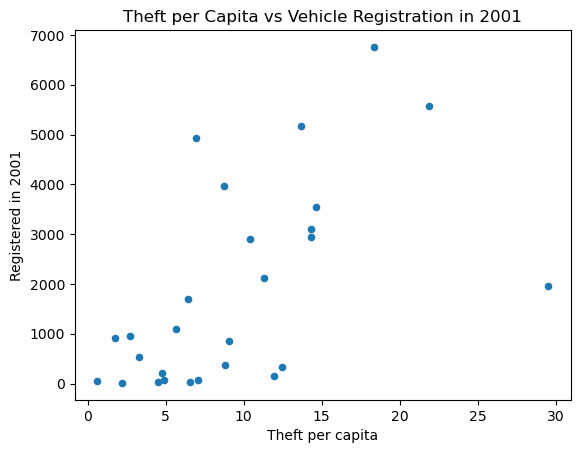

In [124]:
states_only.plot.scatter(x='Theft per capita',y='Registered in 2001',title='Theft per Capita vs Vehicle Registration in 2001')

#Is vehicle ownership density actually correlated with theft?

Contradicitng a standard assumption of linearity between popuation and theft per capita. The plot above in cell [123] depicts that theft per capita is not anyhow directly dependent on population as to draw a conclusion. But we can infer that generlly theft per capita stays low with less population. It is a generalization and not a judgment. We have states wiht theft per capita at 30 but population is there in the smaller side.

In the above plot cell [124], we can infer a sort of linear plot between vehicle registrations and theft per capita. Tho at the base we can observe a cluster, indicating low to medium theft per capita with low vehicle registration. But there is an obvoius increase in TPC with  increase in Registred vehicles state by state. From this we can infer that theft per capita is more correlated to vehcile registration as compared to population, which is very counter-intiutive.  

In [125]:
states_only['recovery rate'] = (states_only['Auto_Theft_Recovered']/states_only['Auto_Theft_Stolen'])*100

<Axes: title={'center': 'Theft per Capita vs recovery rate'}, xlabel='Theft per capita', ylabel='recovery rate'>

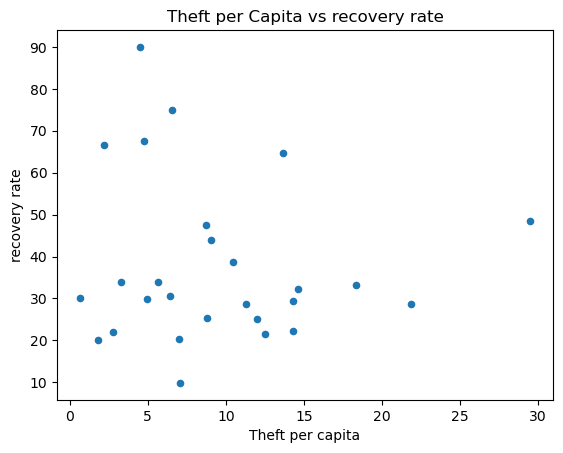

In [126]:
states_only.plot.scatter(x='Theft per capita',y='recovery rate',title='Theft per Capita vs recovery rate')

In [129]:
states_only['recovery rate per capita'] = (states_only['Auto_Theft_Recovered']/states_only['Persons'])*100000

<Axes: title={'center': 'Theft per Capita vs recovery rate per capita'}, xlabel='Theft per capita', ylabel='recovery rate per capita'>

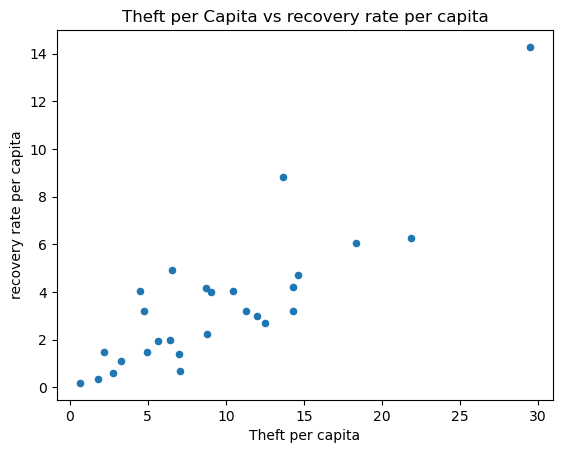

In [130]:
states_only.plot.scatter(x='Theft per capita',y='recovery rate per capita',title='Theft per Capita vs recovery rate per capita')

Recovery rate per capita vs theft per capita is a better comparative study than recovery rate and theft per capita as both are normlaized to the same extent. The plot is to some linear but not in terms of proportional. 

<Axes: xlabel='Theft per capita', ylabel='recovery rate per capita'>

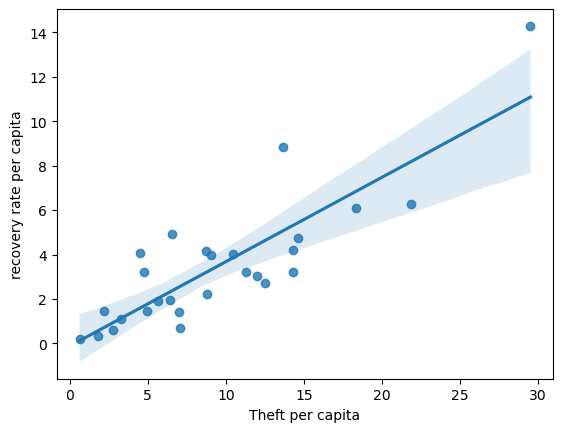

In [131]:
sns.regplot(data=states_only,x='Theft per capita',y='recovery rate per capita')

<Axes: xlabel='Theft per capita', ylabel='recovery rate'>

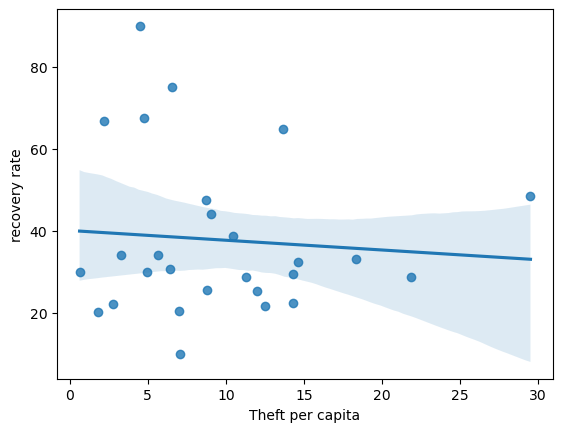

In [141]:
sns.regplot(data=states_only,x='Theft per capita',y='recovery rate')

In [132]:
states_only.sort_values('recovery rate per capita', ascending=True)

,State,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen,Persons,Registered in 2001,Theft per capita,Recovery_Rate,recovery rate,recovery rate per capita
29,TRIPURA,4002,AT1-Motor Cycles/ ScootersAT6-Total,1. Motor Cycles/ Scooters6. Total (Sum of 1-5 ...,0.0,6.0,20,3199203,50,0.625156,0.300000,30.000000,0.187547
14,JHARKHAND,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,30.0,96.0,478,26945829,909,1.773929,0.200837,20.083682,0.356270
4,BIHAR,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,102.0,500.0,2272,82998509,949,2.737399,0.220070,22.007042,0.602420
19,MANIPUR,8004,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,14.0,142,2010275,77,7.063710,0.098592,9.859155,0.696422
3,ASSAM,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,298.0,876,26655528,542,3.286373,0.340183,34.018265,1.117967
30,UTTAR PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,70.0,2354.0,11580,166197921,4921,6.967596,0.203282,20.328152,1.416384
20,MEGHALAYA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,34.0,114,2318822,62,4.916289,0.298246,29.824561,1.466262
27,SIKKIM,6003,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,4.0,8.0,12,540851,12,2.218726,0.666667,66.666667,1.479150
23,ODISHA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,44.0,688.0,2022,35664657,1096,5.669478,0.340257,34.025717,1.929081
32,WEST BENGAL,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,32.0,1582.0,5158,80176197,1690,6.433331,0.306708,30.670803,1.973154


Tripura, Jharkhand and Bihar are among the lowerst Recovery rates per capita. To throw some light on the state of Bihar, it is also among the top 15 in abosulte theft stolen. After careful judgment through normalized parametes, we can infer Bihar as the poorest state in terms on theft and recovery.  

In [133]:
Mean_theft_per_capita = states_only['Theft per capita'].mean()

In [134]:
std_theft_per_capita = states_only['Theft per capita'].std()

In [135]:
states_only['Z-score']=(states_only['Theft per capita']-Mean_theft_per_capita)/std_theft_per_capita

In [137]:
states_only[states_only['Z-score']>=2]

,State,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen,Persons,Registered in 2001,Theft per capita,Recovery_Rate,recovery rate,recovery rate per capita,Z-score
11,HARYANA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,158.0,3020.0,6240,21144564,1949,29.511131,0.483974,48.397436,14.282631,3.032661


#Which states are statistical outliers even after normalization?

Haryana is the only state that is an outlier even after normalization with a Z-Score of around 3.03. Despite not being in the top 5 of absolute theft, Harayana tops the theft per capita due to it's low population against a decent number of auto theft, so much so that the next greatest theft per capita is 8 units less than Harayana, making it an outlier. This was possible by a metric like Z-Score, indicating how raw data and de-normlaized data could be misleading. 

In [138]:
states_only

,State,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen,Persons,Registered in 2001,Theft per capita,Recovery_Rate,recovery rate,recovery rate per capita,Z-score
1,ANDHRA PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,358.0,2960.0,6230,71308587,3966,8.736676,0.475120,47.512039,4.150973,-0.117789
2,ARUNACHAL PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,54.0,72,1097968,21,6.557568,0.750000,75.000000,4.918176,-0.448251
3,ASSAM,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,0.0,298.0,876,26655528,542,3.286373,0.340183,34.018265,1.117967,-0.944329
4,BIHAR,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,102.0,500.0,2272,82998509,949,2.737399,0.220070,22.007042,0.602420,-1.027581
6,CHHATTISGARH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,52.0,830.0,1884,20833803,857,9.042996,0.440552,44.055202,3.983910,-0.071336
10,GUJARAT,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,946.0,3180.0,11074,50671017,5576,21.854702,0.287159,28.715911,6.275777,1.871562
11,HARYANA,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,158.0,3020.0,6240,21144564,1949,29.511131,0.483974,48.397436,14.282631,3.032661
12,HIMACHAL PRADESH,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,24.0,196.0,290,6077900,217,4.771385,0.675862,67.586207,3.224798,-0.719126
13,JAMMU AND KASHMIR,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,2.0,274.0,1266,10143700,330,12.480653,0.216430,21.642970,2.701184,0.449986
14,JHARKHAND,12006,AT1-Motor Cycles/ ScootersAT2-Motor Car/Taxi/J...,1. Motor Cycles/ Scooters2. Motor Car/Taxi/Jee...,30.0,96.0,478,26945829,909,1.773929,0.200837,20.083682,0.356270,-1.173691


#Which state would you prioritize if you were allocating enforcement budget?

There are two contentders for budget allocation, Bihar and Harayana. Harayana having a suspiciously high Z score of 3+, but it also has a recovery per capita of 48.  On the other hand Bihar having a z-score of -1 has recovery per capita of 0.602. I would go against the Z-Score here as the Z-Score doesn't take into account the recovery rate, hence cant be used as a parameter to make a final judgemnt. Thats why I would choose Bihar as the state for enforcement allocation.

Theft per 10k vehicle is not an apropirate measure to take into consideration. The data provided does not take into account the cumulative vehicles registered in the state till now, but vehicles registered in 2001, making parameters like such suffer from denominator bias.